<div align="center"><img src="VidyaLogo.png"/></div>

Data fetched from Kaggle: https://www.kaggle.com/datasets/gregorut/videogamesales

In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#Loading data
data = pd.read_csv("VidyaNoRat.csv")
DataRaw = data.shape[0]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
#Processing data to remove NA and invalid values
data = pd.DataFrame(data)
data = data.drop(data[data['Year'] > 2016].index)
data = data.dropna(axis=0)
data = data.drop("Rank", axis=1)
data['Year'] = data['Year'].astype('int64')

DataProcessed = data.shape[0]
Diff = DataRaw - DataProcessed

print(
    f'We removed {Diff} records from data by processing, leaving us with {DataProcessed} records'
)

We removed 311 records from data by processing, leaving us with 16287 records


In [4]:
#Selecting 7th generation consoles
data7 = data[data['Platform'].isin(['X360', 'PS3', 'Wii', 'PSP', 'DS'])]
data7 = data7[data7['Year'] >= 2005]

data7.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


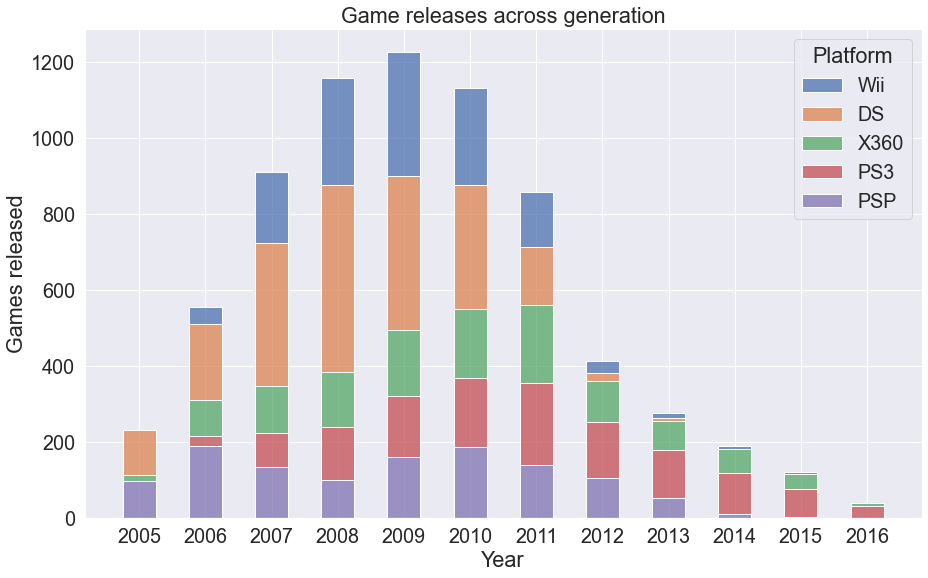

In [5]:
sns.set_theme(style='darkgrid')
sns.set(font_scale=1.8)

plt.subplots(figsize=(15, 9))
plt.xticks(data7['Year'].unique())
plt.title('Game releases across generation')
plt.ylabel('Games released')

sns.histplot(data=data7,
             x='Year',
             hue='Platform',
             multiple='stack',
             shrink=0.5,
             discrete=True)

plt.show()

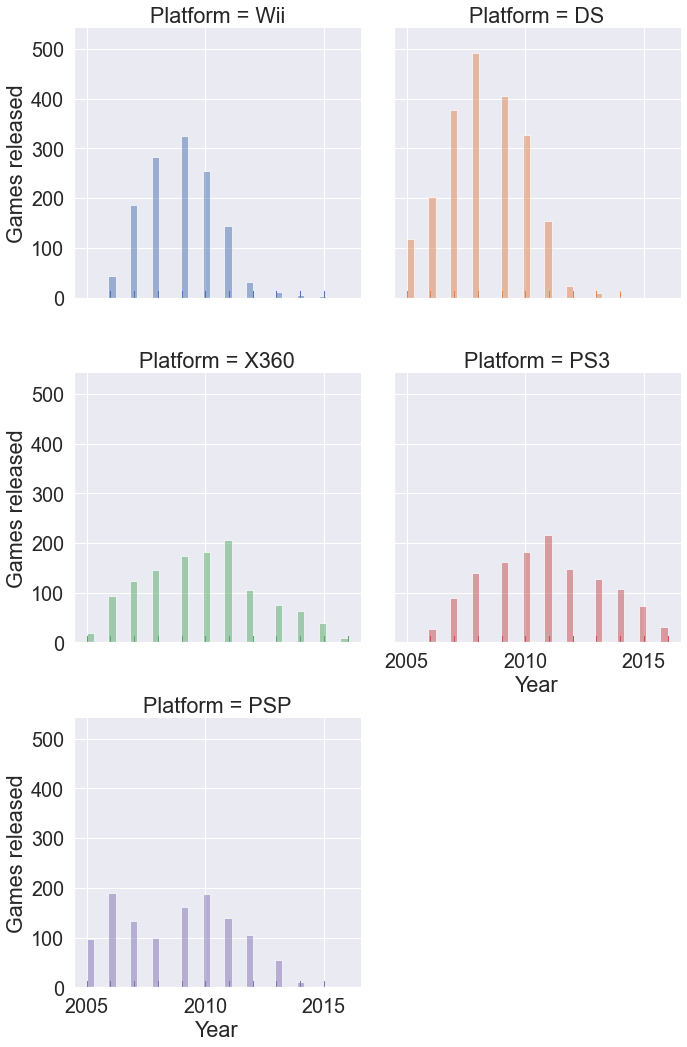

In [6]:
sns.displot(data=data7,
            x='Year',
            hue='Platform',
            col='Platform',
            col_wrap=2,
            legend=False,
            rug=True).set_ylabels('Games released')

plt.show()

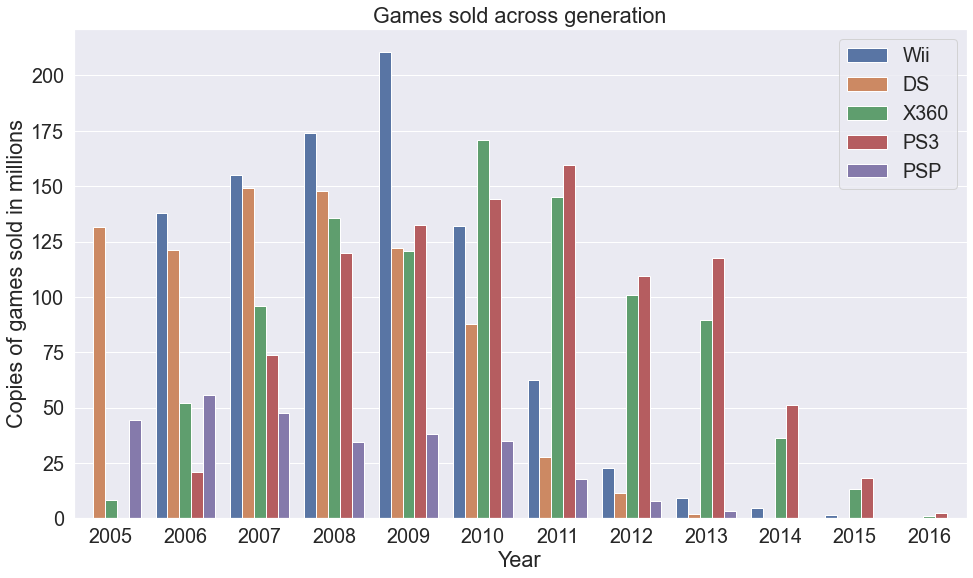

In [7]:
plt.subplots(figsize=(16, 9))

total_sales = sns.barplot(x='Year',
                          y='Global_Sales',
                          data=data7,
                          estimator=sum,
                          hue='Platform',
                          ci=None)

plt.ylabel('Copies of games sold in millions')
plt.title('Games sold across generation')
plt.legend(loc='upper right')
plt.show()

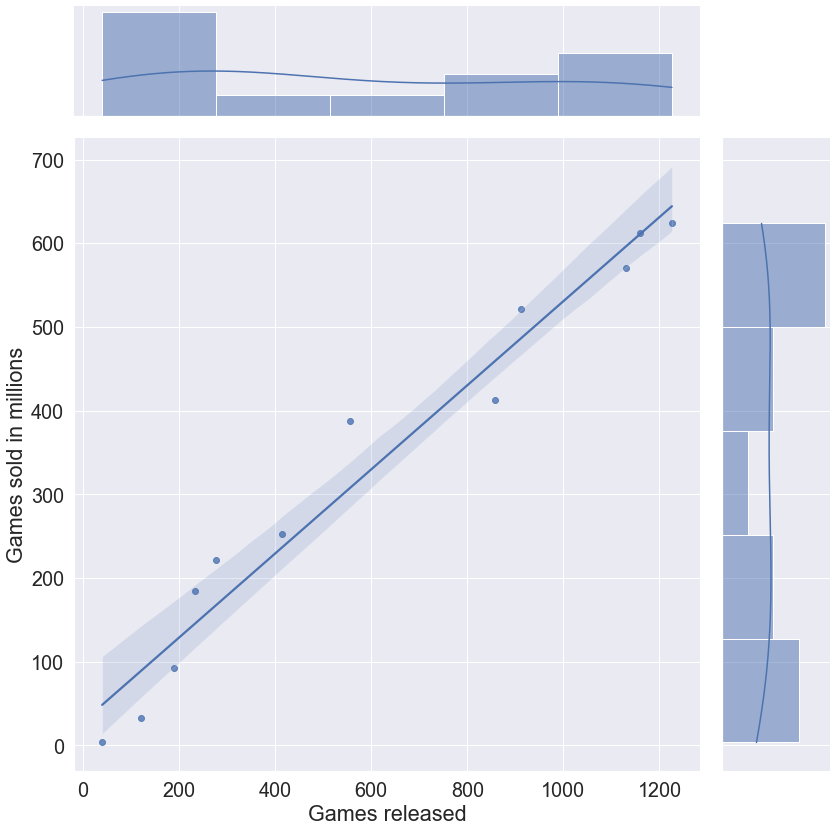

In [8]:
sales = data7.groupby('Year')['Global_Sales'].sum()
releases = data7.groupby('Year')['Name'].count()

sal_rel_joint = sns.jointplot(data=data7,
                              x=releases,
                              y=sales,
                              kind='reg',
                              height=12)

sal_rel_joint.set_axis_labels('Games released', 'Games sold in millions')
plt.show()

With the increase of released games, copies of games sold also raise (not a huge discovery).

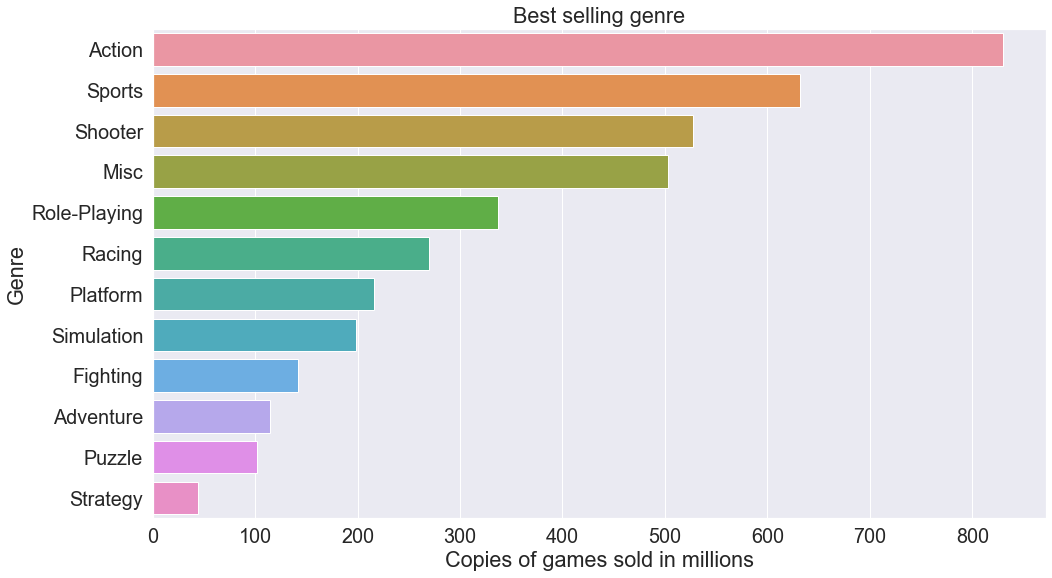

In [9]:
plt.subplots(figsize=(16, 9))
sales_order = data7.groupby('Genre')['Global_Sales'].sum().sort_values(
    ascending=False).index.values

genre_sales = sns.barplot(x='Global_Sales',
                          y='Genre',
                          data=data7,
                          estimator=sum,
                          order=sales_order,
                          ci=None)

plt.xlabel('Copies of games sold in millions')
plt.ylabel('Genre')
plt.title('Best selling genre')
plt.show()

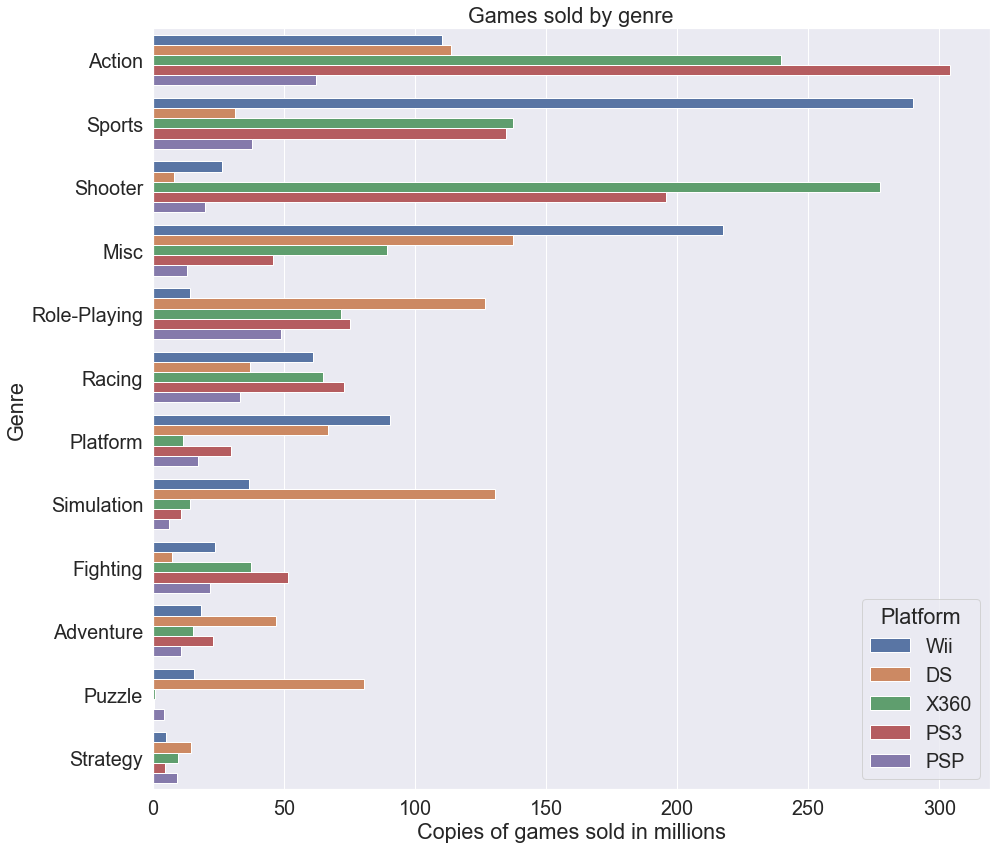

In [10]:
plt.subplots(figsize=(15, 14))
sales_order = data7.groupby('Genre')['Global_Sales'].sum().sort_values(
    ascending=False).index.values

genre_sales = sns.barplot(x='Global_Sales',
                          y='Genre',
                          data=data7,
                          hue='Platform',
                          estimator=sum,
                          order=sales_order,
                          ci=None)

plt.xlabel('Copies of games sold in millions')
plt.ylabel('Genre')
plt.title('Games sold by genre')
plt.show()

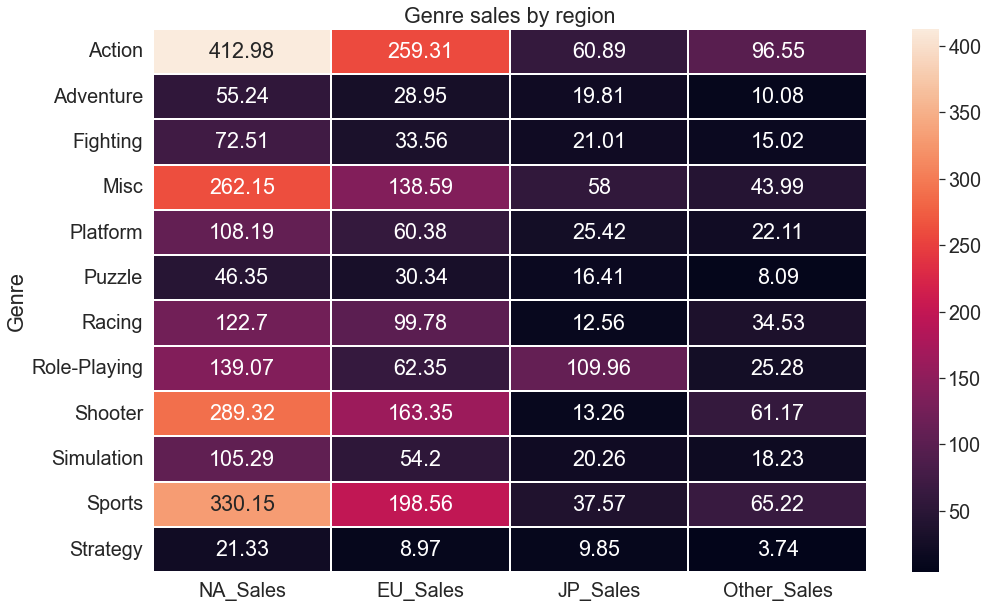

In [11]:
genre_section = data7[[
    'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'
]]
genre_sale = genre_section.groupby('Genre').sum()

plt.subplots(figsize=(16, 10))
sns.heatmap(genre_sale, annot=True, fmt='g', linewidths=0.4)

plt.title('Genre sales by region')
plt.show()

Action genre generated the highest profits everywhere except Japan, where Role-Playing games dominated.

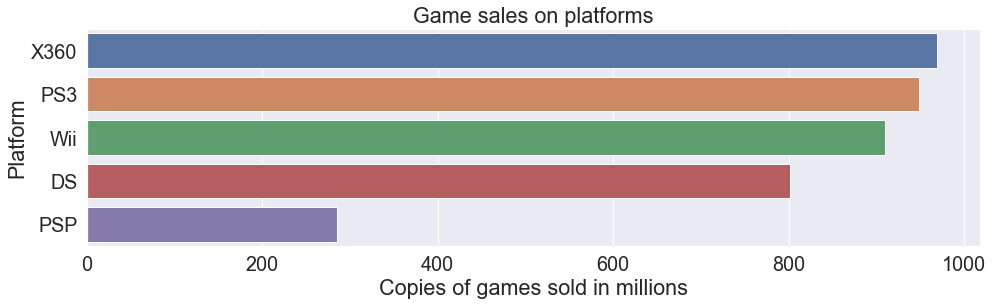

In [12]:
plt.subplots(figsize=(16, 4))
sales_order = data7.groupby('Platform')['Global_Sales'].sum().sort_values(
    ascending=False).index.values

platform_sales = sns.barplot(x='Global_Sales',
                             y='Platform',
                             data=data7,
                             estimator=sum,
                             order=sales_order,
                             ci=None)

plt.xlabel('Copies of games sold in millions')
plt.ylabel('Platform')
plt.title('Game sales on platforms')
plt.show()

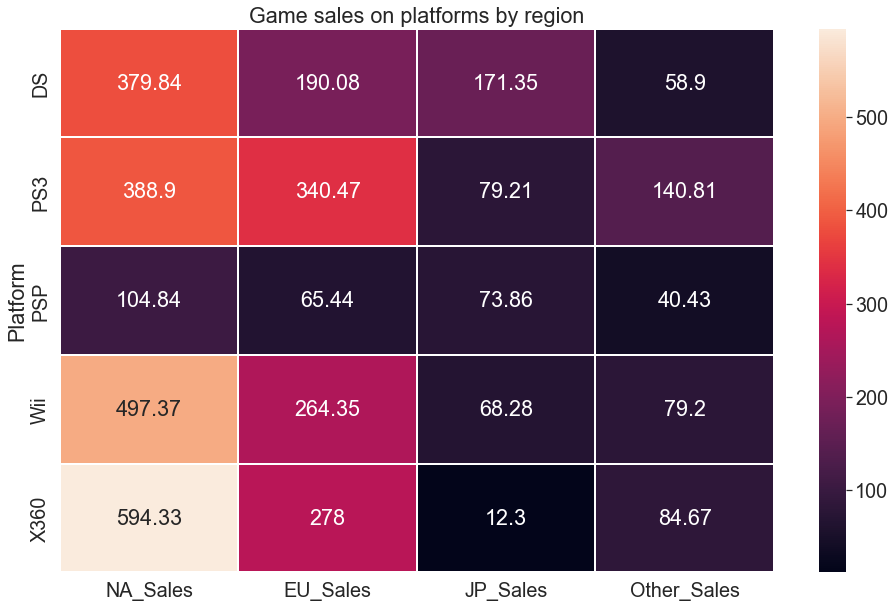

In [13]:
genre_section = data7[[
    'Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'
]]
genre_sale = genre_section.groupby('Platform').sum()

plt.subplots(figsize=(16, 10))
sns.heatmap(genre_sale, annot=True, fmt='g', linewidths=0.4)

plt.title('Game sales on platforms by region')
plt.show()

This time, each of the three distinguished regions had their favorite console, for North America it was Microsoft Xbox 360, for Europe - Sony PlayStation 3 and for Japan - Nintendo DS.

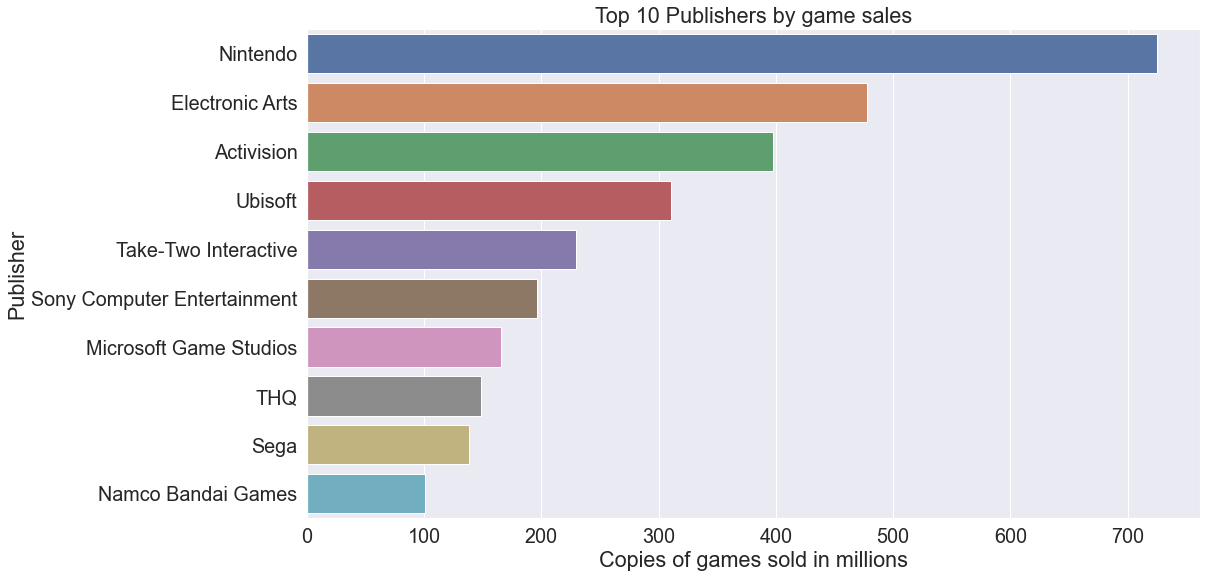

In [14]:
plt.subplots(figsize=(16, 9))
sns.set
sales_order = data7.groupby('Publisher')['Global_Sales'].sum().sort_values(
    ascending=False).index.values

publisher_sales = sns.barplot(x='Global_Sales',
                              y='Publisher',
                              data=data7,
                              estimator=sum,
                              order=sales_order[0:10],
                              ci=None)

plt.xlabel('Copies of games sold in millions')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers by game sales')
plt.show()

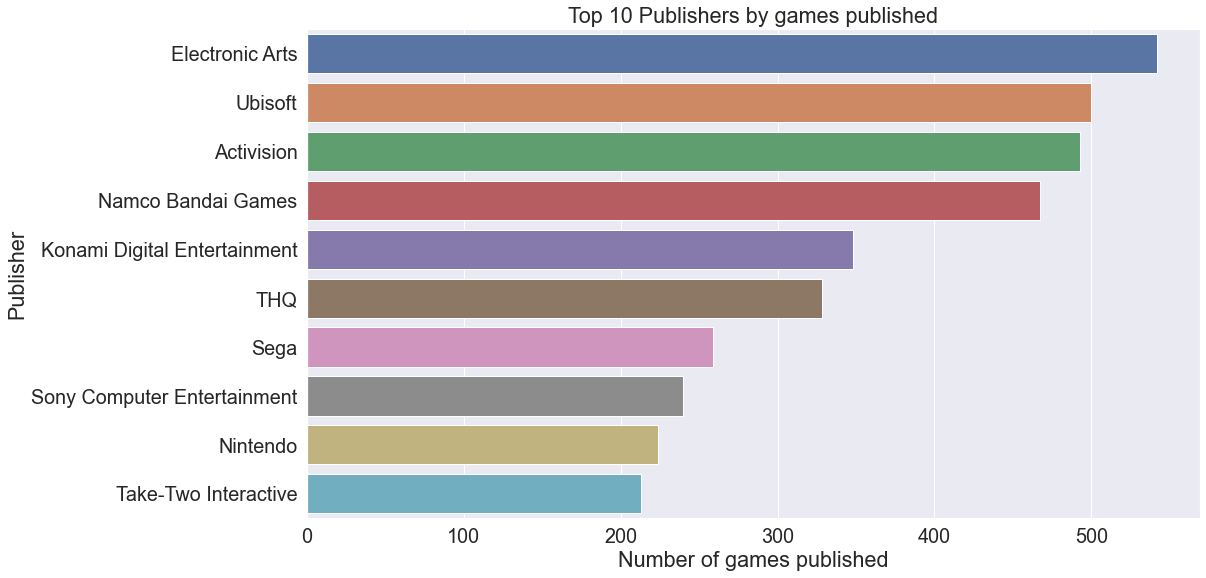

In [15]:
plt.subplots(figsize=(16, 9))

publisher_count = sns.countplot(
    y='Publisher',
    data=data7,
    order=data7.groupby('Publisher')['Name'].count().sort_values(
        ascending=False).iloc[:10].index,
    orient='h')

plt.xlabel('Number of games published')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers by games published')
plt.show()

Electronic Arts published the most games in the 7th generation, but came in second in terms of sales. Interestingly, Nintendo sold the most games while ranking only 9th in terms of number of games published. Quantity of published games didn't grant highest sales. It is worth noting, that releasing one game on multiple platforms results in multiple entries in counting.

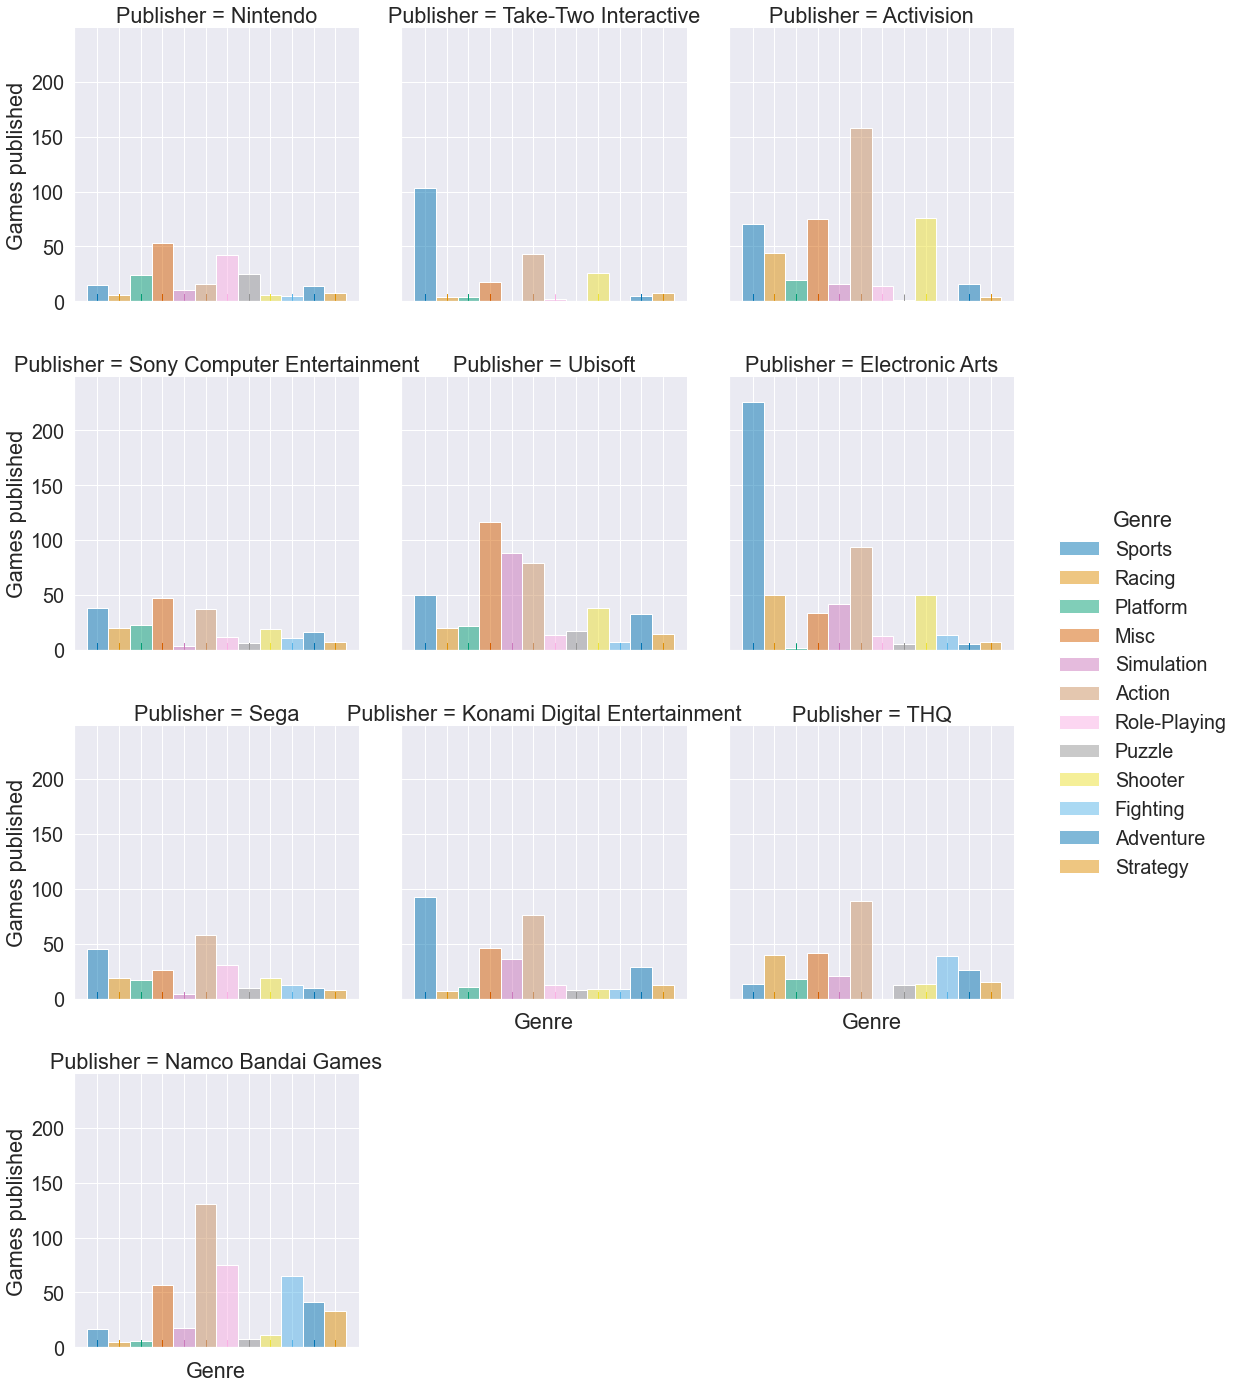

In [16]:
Top_10Publishers = [
    'Electronic Arts', 'Ubisoft', 'Activision', 'Namco Bandai Games',
    'Konami Digital Entertainment', 'THQ', 'Sega',
    'Sony Computer Entertainment', 'Nintendo', 'Take-Two Interactive'
]

Top_Publishers_data = data7[data7['Publisher'].isin(Top_10Publishers)]

Publisher_genres = sns.displot(data=Top_Publishers_data,
                               x='Genre',
                               hue='Genre',
                               col='Publisher',
                               col_wrap=3,
                               legend=True,
                               rug=True,
                               palette='colorblind')

Publisher_genres.set(xticklabels=[], ylabel='Games published')
plt.show()

Electronic Arts dominated Sports genre, publishing over 200 games. Ubisoft took more of a balanced approach, focusing on as many as three genres: Misc, Simulation and Action. Activision mainly made Action and Shooter games. Namco Bandai Games mainly published Action games, but interestingly they published the most Role-Playing games of all 10 competitors - as a Japanese company they were the main source of Role-Playing games loved by their countrymen.

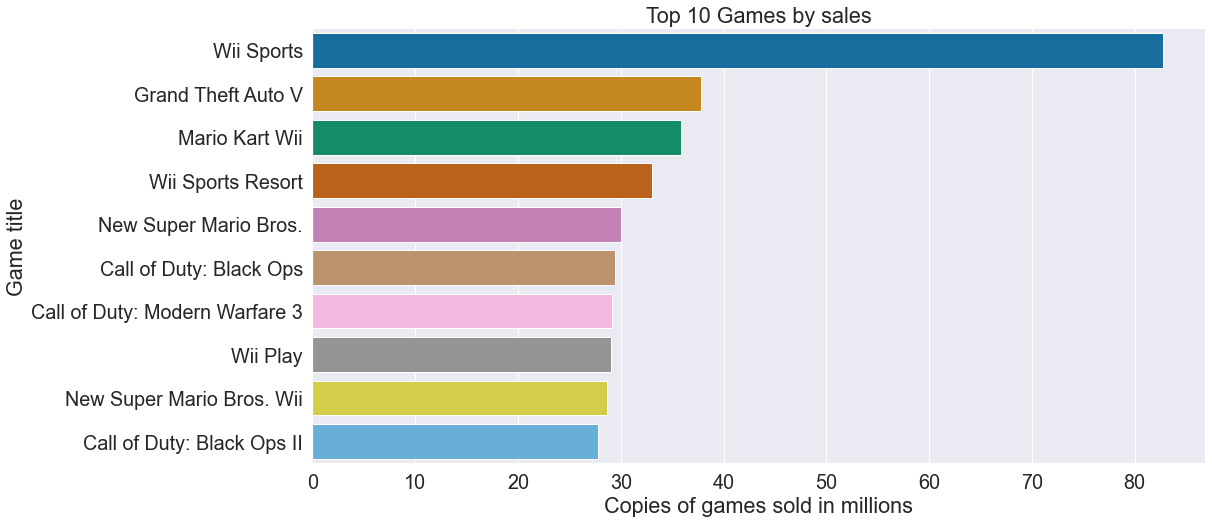

In [17]:
plt.subplots(figsize=(16, 8))
sales_order = data7.groupby('Name')['Global_Sales'].sum().sort_values(
    ascending=False).index.values

Game_sales = sns.barplot(x='Global_Sales',
                         y='Name',
                         data=data7,
                         estimator=sum,
                         order=sales_order[0:10],
                         ci=None,
                         palette='colorblind')

plt.xlabel('Copies of games sold in millions')
plt.ylabel('Game title')
plt.title('Top 10 Games by sales')
plt.show()

Wii Sports sold more than twice as many copies as Grand Theft Auto V, achieving the title of best-selling game of the 7th generation of consoles. How did Wii Sports win with GTA V from Rockstar Games, which was the most anticipated game of the generation? Most Nintendo Wii consoles were sold bundled with Wii Sports, the game was designed to showcase the assets of the console - mainly quite fun motion controls.